In [1]:
#Importing Pckages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# Data Sourcing

In [2]:
#Importing csv file here
df = pd.read_csv('Uber Data.csv', parse_dates=[4,5], dayfirst=True, na_values="NA")

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [4]:
#Inspecting the dataframe
print(df.shape)
print(df.info())
print(df.describe())

(6745, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB
None
        Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000


# Data checking, Modification and Cleaning

In [5]:
#replacing space in column with '_'
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [6]:
#checking for any duplicate rows
df.duplicated(subset='Request_id',keep= False).sum()

0

In [7]:
#Inspecting Null values
df.isnull().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
dtype: int64

In [8]:
#checking unique values in status column
df['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

# Preparation of Data

In [9]:
df['request_Date_Time'] = pd.to_datetime(df['Request_timestamp'],dayfirst=True)
df['drop_Date_Time'] = pd.to_datetime(df['Drop_timestamp'],dayfirst=True)
df.head(15)

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,request_Date_Time,drop_Date_Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11 06:46:00,2016-07-11 07:25:00


In [10]:
#checking if request_Date_Time and drop_Date_Time got converted to datetime type or not
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Driver_id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request_timestamp  6745 non-null   datetime64[ns]
 5   Drop_timestamp     2831 non-null   datetime64[ns]
 6   request_Date_Time  6745 non-null   datetime64[ns]
 7   drop_Date_Time     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(2)
memory usage: 421.7+ KB
None


In [11]:
#dropping Request_timestamp column and Drop_timestamp  as it is not required any further
df = df.drop('Request_timestamp', axis=1)
df = df.drop('Drop_timestamp', axis=1)
df.head()

,Request_id,Pickup_point,Driver_id,Status,request_Date_Time,drop_Date_Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [12]:
#Inspecting the dataframe after the drop
print(df.shape)
print(df.info())

(6745, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Driver_id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   request_Date_Time  6745 non-null   datetime64[ns]
 5   drop_Date_Time     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB
None


In [13]:
#checking if there are any NA's coerced because of invalid values in request_Date_Time
df['request_Date_Time'].isna().sum()

0

In [14]:
df['request_Date'] = df['request_Date_Time'].dt.date
df['request_Time'] = df['request_Date_Time'].dt.time
df.head(10)

,Request_id,Pickup_point,Driver_id,Status,request_Date_Time,drop_Date_Time,request_Date,request_Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00


In [15]:
#extracting day of week from request date time
df['request_DayOfWeek'] = df['request_Date_Time'].dt.day_name()
df.head()

,Request_id,Pickup_point,Driver_id,Status,request_Date_Time,drop_Date_Time,request_Date,request_Time,request_DayOfWeek
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday


In [16]:
#extracting day of week from request date time
df['request_hour'] = df['request_Date_Time'].dt.hour
df.head()

,Request_id,Pickup_point,Driver_id,Status,request_Date_Time,drop_Date_Time,request_Date,request_Time,request_DayOfWeek,request_hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8


In [17]:
#extracting hour,min and seconds from Request Date_Time

df['RequestHour'] = df['request_Date_Time'].dt.hour
df.head()

,Request_id,Pickup_point,Driver_id,Status,request_Date_Time,drop_Date_Time,request_Date,request_Time,request_DayOfWeek,request_hour,RequestHour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8,8


In [18]:
#Assigning slot of time

df.loc[df['RequestHour'].between(0,3, inclusive=True),'TimeSlot'] = 'Late night'
df.loc[df['RequestHour'].between(4,6, inclusive=True),'TimeSlot'] = 'Early morning'
df.loc[df['RequestHour'].between(7,12, inclusive=True),'TimeSlot'] = 'Morning'
df.loc[df['RequestHour'].between(13,17, inclusive=True),'TimeSlot'] = 'Afternoon'
df.loc[df['RequestHour'].between(18,20, inclusive=True),'TimeSlot'] = 'Evening'
df.loc[df['RequestHour'].between(21,24, inclusive=True),'TimeSlot'] = 'Night'
df.head()

,Request_id,Pickup_point,Driver_id,Status,request_Date_Time,drop_Date_Time,request_Date,request_Time,request_DayOfWeek,request_hour,RequestHour,TimeSlot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11,11,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17,17,Afternoon
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8,8,Morning


In [19]:
#checking if any new columns created has Na's
df.isna().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
request_Date_Time       0
drop_Date_Time       3914
request_Date            0
request_Time            0
request_DayOfWeek       0
request_hour            0
RequestHour             0
TimeSlot                0
dtype: int64

In [20]:
#extracting date and time from drop_Date_Time

df['drop_Date'] = df['drop_Date_Time'].dt.date
df['drop_Time'] = df['drop_Date_Time'].dt.time

df.head(10)

,Request_id,Pickup_point,Driver_id,Status,request_Date_Time,drop_Date_Time,request_Date,request_Time,request_DayOfWeek,request_hour,RequestHour,TimeSlot,drop_Date,drop_Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11,11,Morning,2016-07-11,13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17,17,Afternoon,2016-07-11,18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9,9,Morning,2016-07-12,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21,21,Night,2016-07-12,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8,8,Morning,2016-07-13,09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,Wednesday,21,21,Night,2016-07-13,22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,Thursday,6,6,Early morning,2016-07-14,07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,Friday,5,5,Early morning,2016-07-15,06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,Friday,17,17,Afternoon,2016-07-15,18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,Monday,6,6,Early morning,2016-07-11,07:25:00


In [21]:
# Distinguish the Supply-Demand Gap by a new variable Cab Availability where Supply is when Trip is Completed, all else is Demand
df["Cab Availability"] = df["Status"].apply(lambda x: "Available" if x=="Trip Completed" else "Not Available")
df.head()

,Request_id,Pickup_point,Driver_id,Status,request_Date_Time,drop_Date_Time,request_Date,request_Time,request_DayOfWeek,request_hour,RequestHour,TimeSlot,drop_Date,drop_Time,Cab Availability
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11,11,Morning,2016-07-11,13:00:00,Available
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17,17,Afternoon,2016-07-11,18:47:00,Available
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9,9,Morning,2016-07-12,09:58:00,Available
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21,21,Night,2016-07-12,22:03:00,Available
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8,8,Morning,2016-07-13,09:25:47,Available


# Analysis Data

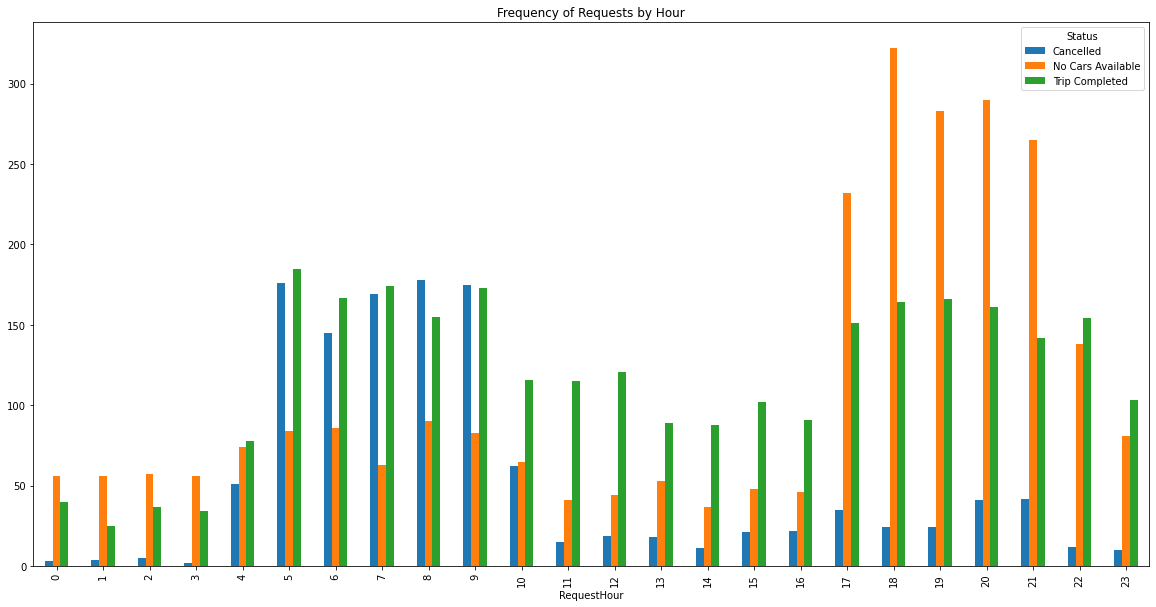

In [22]:
# Frequency of Requests by Hour
df.groupby(['RequestHour','Status']).size().unstack().plot(kind='bar',figsize=(20, 10))
plt.title('Frequency of Requests by Hour')
plt.show()

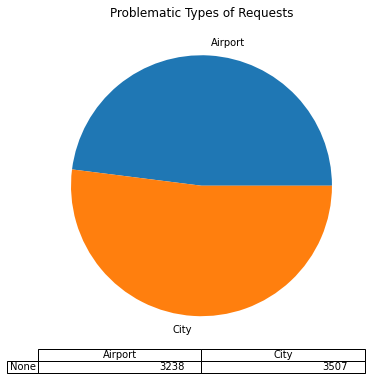

In [23]:
#  Most problematic types of Requests
df.groupby(['Pickup_point']).size().plot(kind="pie",stacked=True,figsize=(6, 6),table=True,title="Problematic Types of Requests")
plt.ylabel("")
plt.show()

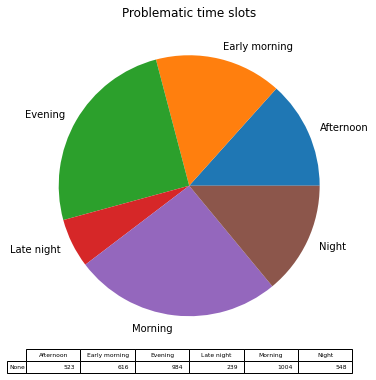

In [24]:
# Most Problematic time slots 
df[(df["Cab Availability"]=="Not Available")].groupby(['TimeSlot']).size().plot(kind="pie",stacked=True,figsize=(6, 6),table=True,title="Problematic time slots")
plt.ylabel("")
plt.show()



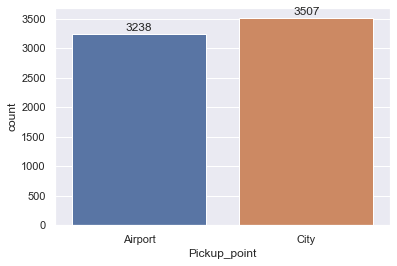

In [25]:
#To see howmany request we get
sns.set(style="darkgrid")
ax = sns.countplot(x="Pickup_point", data=df)
for p in ax.patches:
    value = p.get_height()
    X = p.get_x()+0.4
    Y = p.get_height()+50
    ax.text(X, Y, value, ha="center")
plt.show()

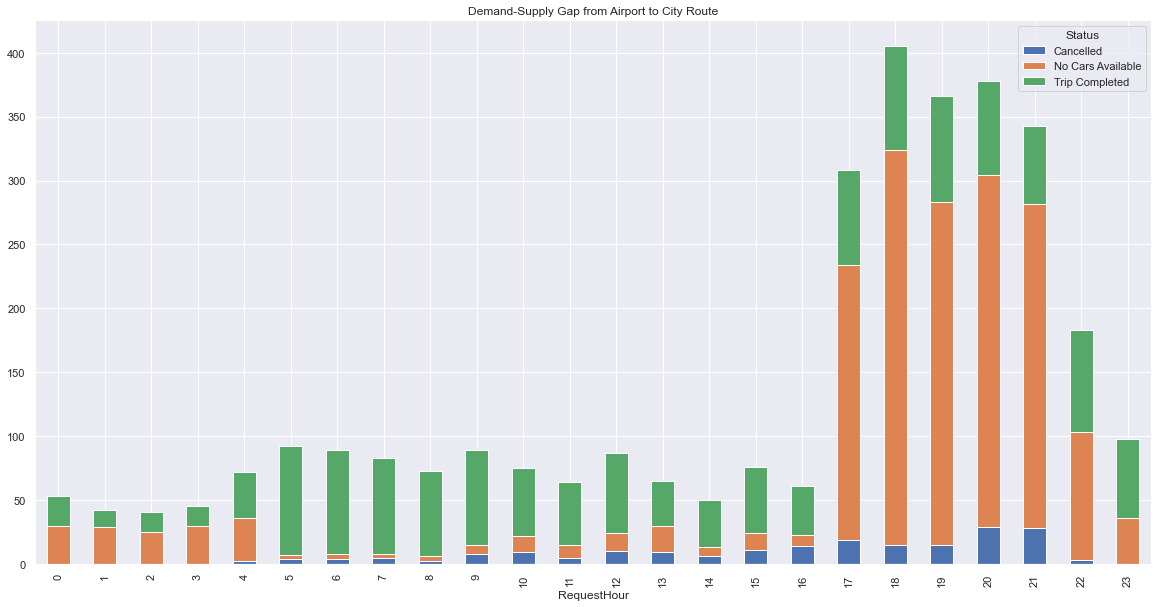

In [26]:
# Demand-Supply Gap from Airport to City
df[(df['Pickup_point']=="Airport")].groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Demand-Supply Gap from Airport to City Route')
plt.show()

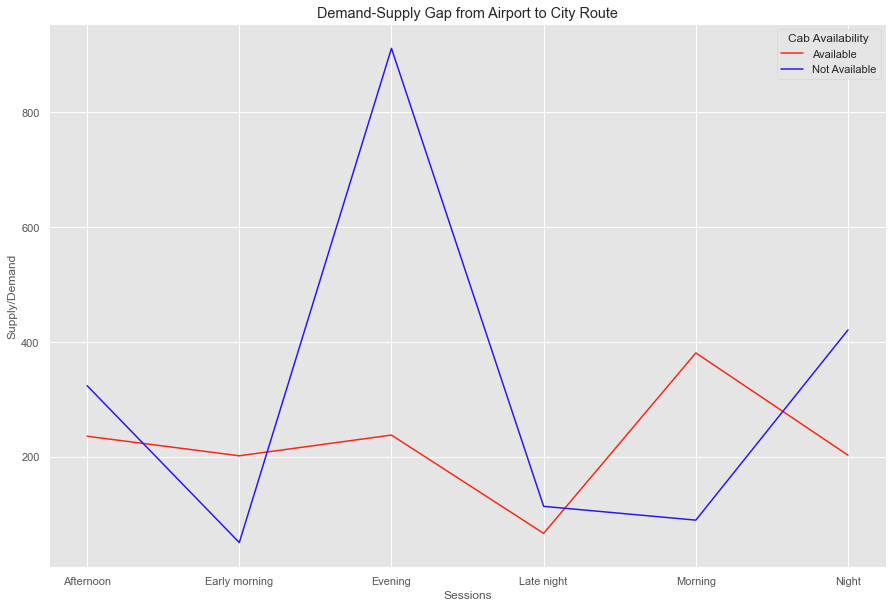

In [27]:
# Demand-Supply Gap from Airport to City

df_citytoairport_supplydemand=df[df["Pickup_point"].str.contains('Airport')==True]
plt.style.use('ggplot')
colours = ["#F62817", "#2916F5"]
df_citytoairport_supplydemand.groupby(['TimeSlot','Cab Availability']).Status.count().unstack().plot.line(legend=True, figsize=(15,10),color=colours)
plt.title('Demand-Supply Gap from Airport to City Route')
plt.xlabel('Sessions')
plt.ylabel('Supply/Demand')
plt.show()

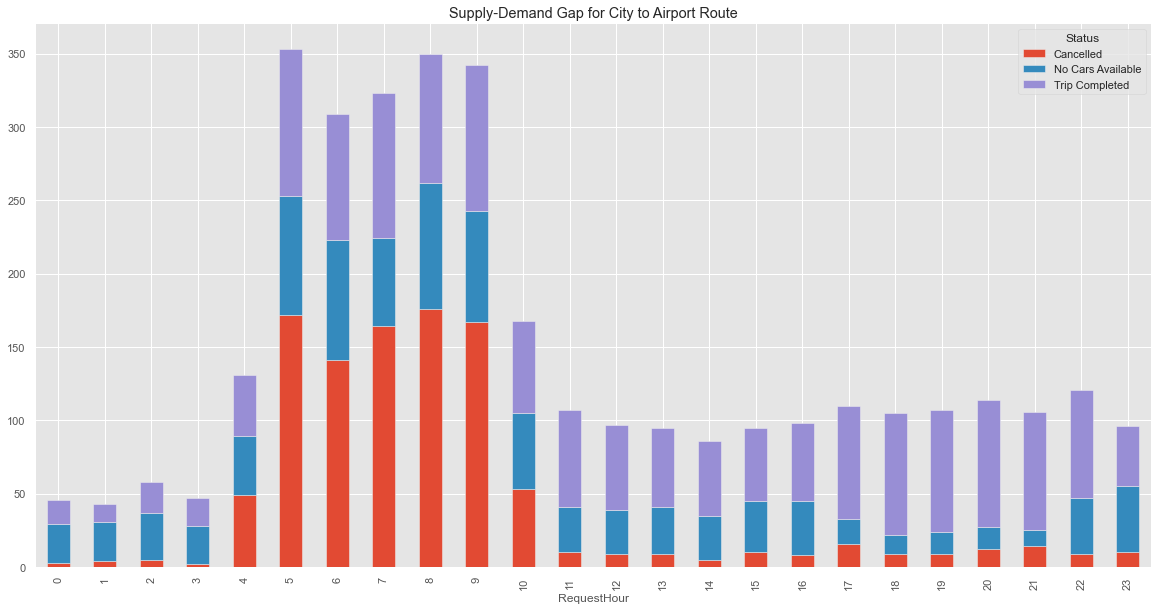

In [28]:
# Demand-Supply Gap from City to Airport
df[(df['Pickup_point']=="City")].groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Supply-Demand Gap for City to Airport Route')
plt.show()

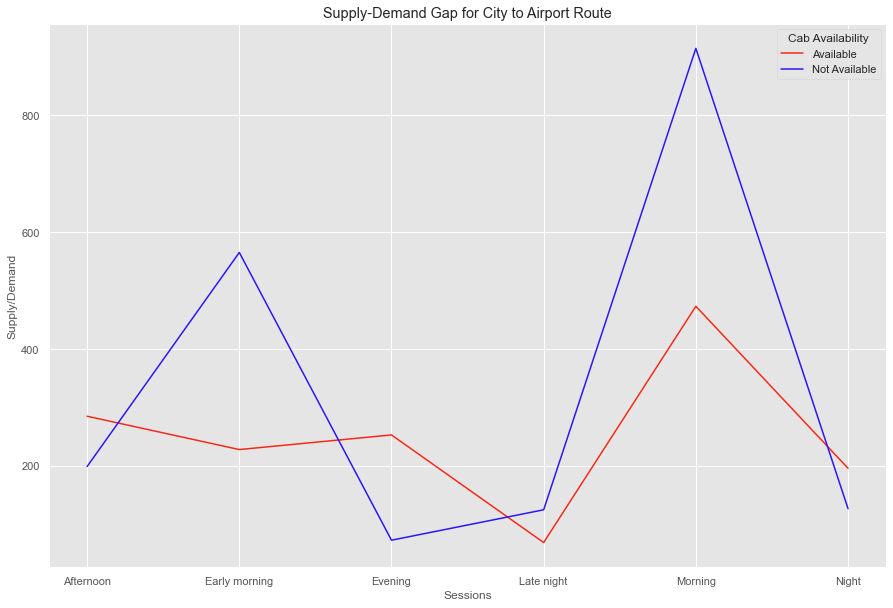

In [29]:
# Demand-Supply Gap from City to Airport

df_citytoairport_supplydemand=df[df["Pickup_point"].str.contains('City')==True]
plt.style.use('ggplot')
colours = ["#F62817", "#2916F5"]
df_citytoairport_supplydemand.groupby(['TimeSlot','Cab Availability']).Status.count().unstack().plot.line(legend=True, figsize=(15,10),color=colours)
plt.title('Supply-Demand Gap for City to Airport Route')
plt.xlabel('Sessions')
plt.ylabel('Supply/Demand')
plt.show()

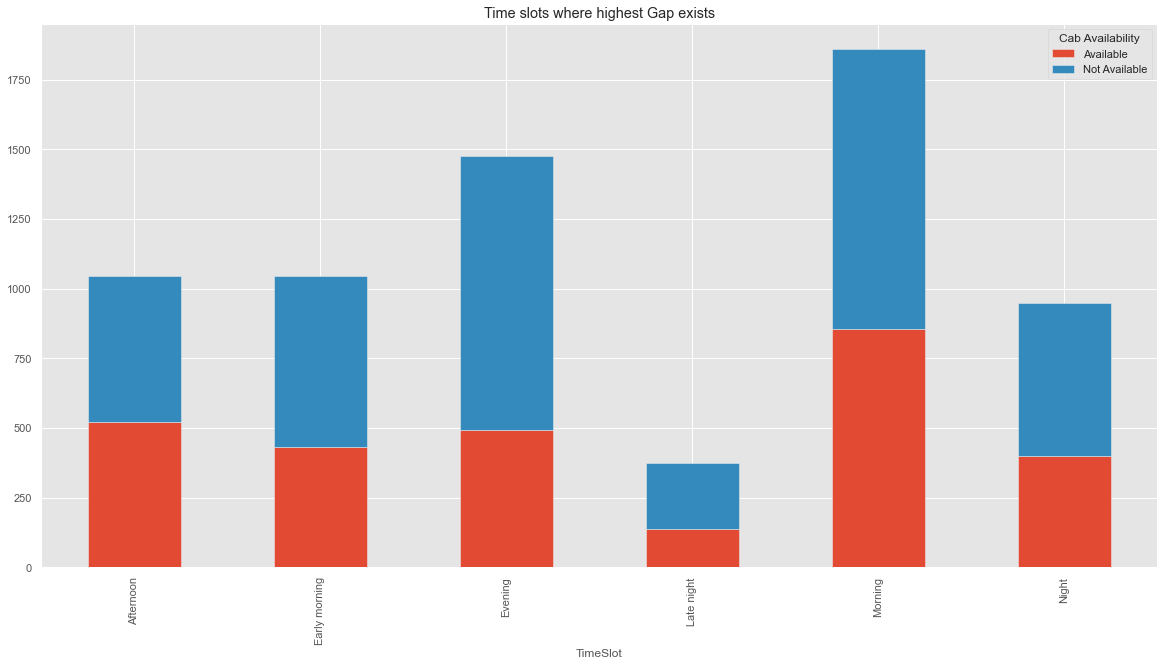

In [30]:
# Time slots where highest Gap exists
df.groupby(['TimeSlot','Cab Availability']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Time slots where highest Gap exists')
plt.show()

In [31]:
#For gap calcullation 
df.loc[(df.Status == 'Trip Completed') | (df.Status == 'Cancelled')| (df.Status == 'No Cars Available'), 'demand'] = 'Demand' 
df.loc[(df.Status == 'Trip Completed'), 'supply'] = 'Supply'
df.loc[(df.Status == 'Cancelled')| (df.Status == 'No Cars Available'), 'gap'] = 'Gap' 

In [32]:
#assign dataframe slot to count supply, demand and gap
uber_SupplyandDemand = pd.DataFrame([df.demand,df.supply,df.gap]).transpose()
uber_SupplyandDemand.head()

,demand,supply,gap
0,Demand,Supply,NaN
1,Demand,Supply,NaN
2,Demand,Supply,NaN
3,Demand,Supply,NaN
4,Demand,Supply,NaN


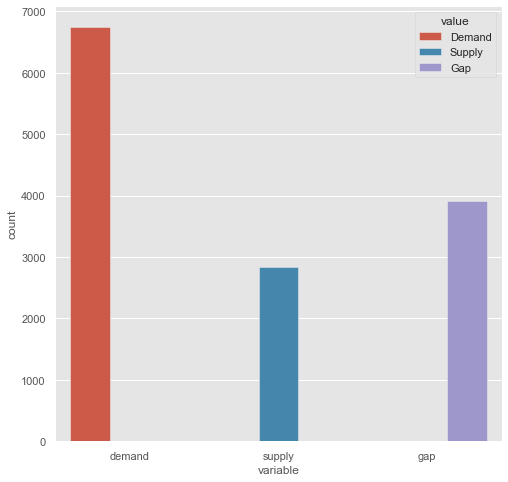

In [33]:
#For see the ratio between demand and supply
plt.figure(num=None, figsize=(8, 8), facecolor='w', edgecolor='k')
sns.countplot(x="variable",hue="value", data=pd.melt(uber_SupplyandDemand))
plt.show()

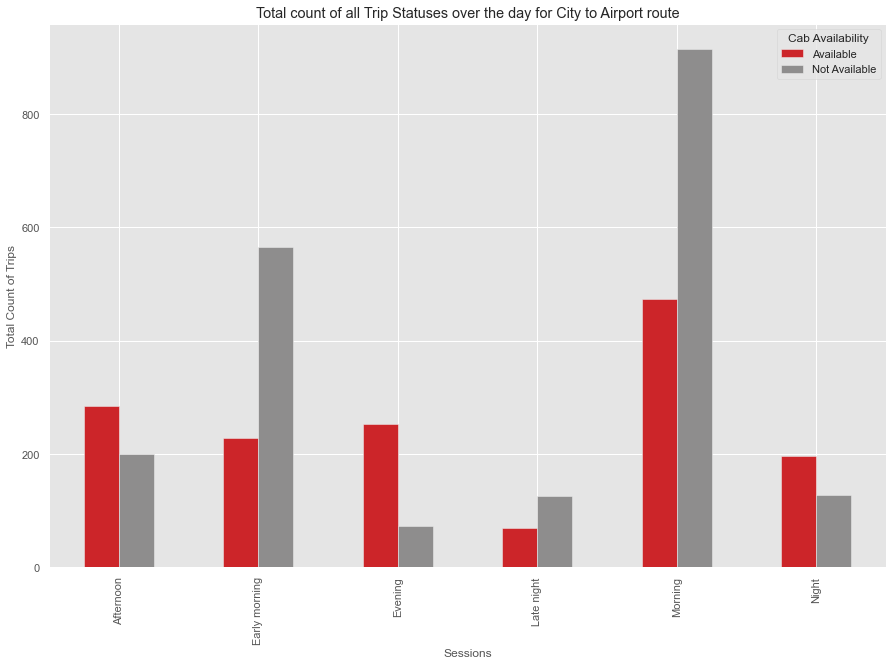

In [34]:
# Filtering out trips in the City to Airport route. Pick-up Point - City
df_citytoairport=df[df["Pickup_point"].str.contains('City')==True]
plt.style.use('ggplot')
colors = ["#CC2529", "#8E8D8D","#008000"]
df_citytoairport.groupby(['TimeSlot','Cab Availability']).Status.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Total count of all Trip Statuses over the day for City to Airport route')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trips')
plt.show()

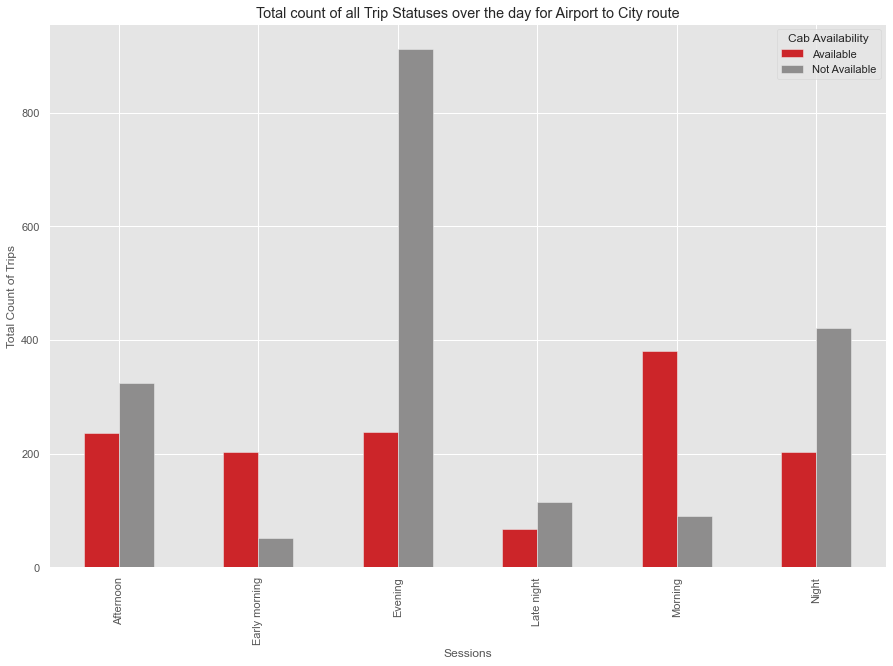

In [35]:
# Filtering out trips in the Airport to City route. Pick-up Point - Airport
df_citytoairport=df[df["Pickup_point"].str.contains('Airport')==True]
plt.style.use('ggplot')
colors = ["#CC2529", "#8E8D8D","#008000"]
df_citytoairport.groupby(['TimeSlot','Cab Availability']).Status.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Total count of all Trip Statuses over the day for Airport to City route')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trips')
plt.show()

In [36]:
# Filtering out only "Cancelled"  trips
df_nocar=df[df["Status"].str.contains('No Car')==True]
df_nocar=df_nocar.reset_index(drop=True)
df_nocar.head()

,Request_id,Pickup_point,Driver_id,Status,request_Date_Time,drop_Date_Time,request_Date,request_Time,request_DayOfWeek,request_hour,RequestHour,TimeSlot,drop_Date,drop_Time,Cab Availability,demand,supply,gap
0,1362,City,NaN,No Cars Available,2016-07-11 00:02:00,NaT,2016-07-11,00:02:00,Monday,0,0,Late night,NaT,NaT,Not Available,Demand,NaN,Gap
1,1364,City,NaN,No Cars Available,2016-07-11 00:06:00,NaT,2016-07-11,00:06:00,Monday,0,0,Late night,NaT,NaT,Not Available,Demand,NaN,Gap
2,1366,City,NaN,No Cars Available,2016-07-11 00:09:00,NaT,2016-07-11,00:09:00,Monday,0,0,Late night,NaT,NaT,Not Available,Demand,NaN,Gap
3,2,Airport,NaN,No Cars Available,2016-07-11 00:23:00,NaT,2016-07-11,00:23:00,Monday,0,0,Late night,NaT,NaT,Not Available,Demand,NaN,Gap
4,7,Airport,NaN,No Cars Available,2016-07-11 00:30:00,NaT,2016-07-11,00:30:00,Monday,0,0,Late night,NaT,NaT,Not Available,Demand,NaN,Gap


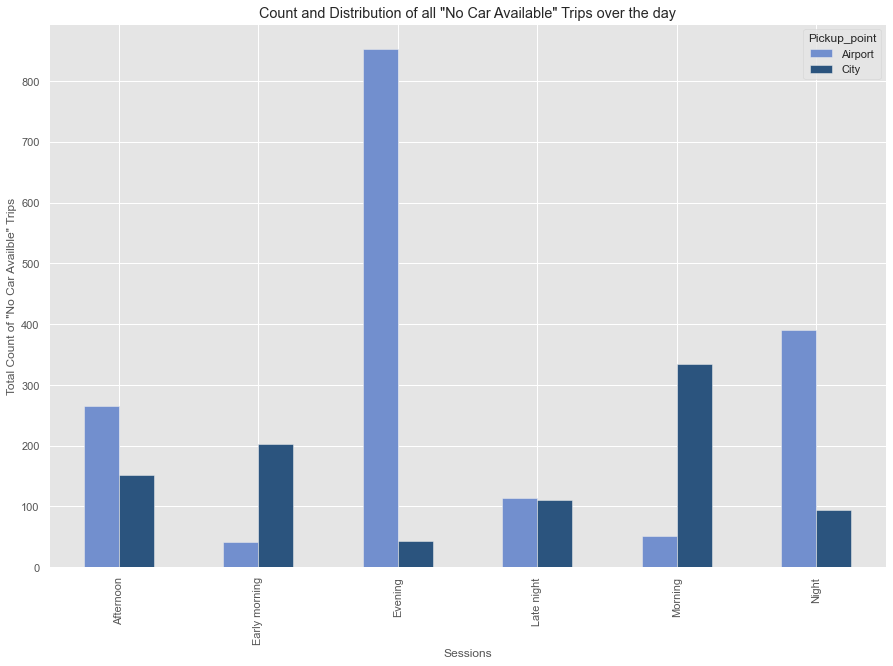

In [37]:
#Filtering out gap of No Car Available between Airport and City
plt.style.use('ggplot')
colors = ["#728FCE", "#2B547E"]
df_nocar.groupby(['TimeSlot','Pickup_point']).TimeSlot.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Count and Distribution of all "No Car Available" Trips over the day')
plt.xlabel('Sessions')
plt.ylabel('Total Count of "No Car Availble" Trips')
plt.show()

In [38]:
# Filtering out only "Cancelled"  trips
df_tripscancelled=df[df["Status"].str.contains('Cancelled')==True]
df_tripscancelled=df_tripscancelled.reset_index(drop=True)
df_tripscancelled.head()

,Request_id,Pickup_point,Driver_id,Status,request_Date_Time,drop_Date_Time,request_Date,request_Time,request_DayOfWeek,request_hour,RequestHour,TimeSlot,drop_Date,drop_Time,Cab Availability,demand,supply,gap
0,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016-07-13,06:08:41,Wednesday,6,6,Early morning,NaT,NaT,Not Available,Demand,NaN,Gap
1,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016-07-14,17:07:58,Thursday,17,17,Afternoon,NaT,NaT,Not Available,Demand,NaN,Gap
2,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016-07-14,20:51:37,Thursday,20,20,Evening,NaT,NaT,Not Available,Demand,NaN,Gap
3,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016-07-15,10:12:40,Friday,10,10,Morning,NaT,NaT,Not Available,Demand,NaN,Gap
4,2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,2016-07-12,19:14:00,Tuesday,19,19,Evening,NaT,NaT,Not Available,Demand,NaN,Gap


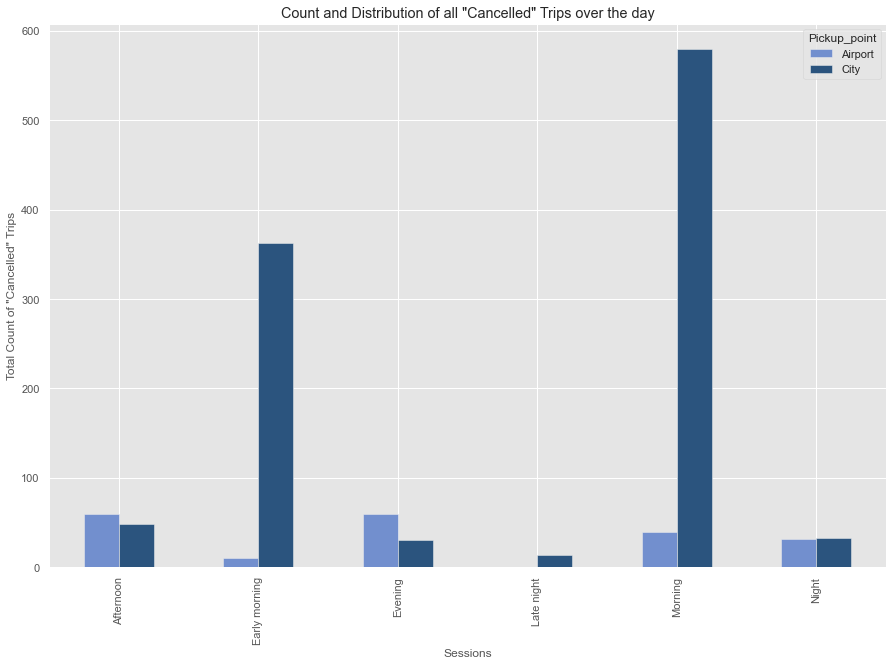

In [39]:
#ploting cancelling trip
plt.style.use('ggplot')
colors = ["#728FCE", "#2B547E"]
df_tripscancelled.groupby(['TimeSlot','Pickup_point']).Status.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Count and Distribution of all "Cancelled" Trips over the day')
plt.xlabel('Sessions')
plt.ylabel('Total Count of "Cancelled" Trips')
plt.show()

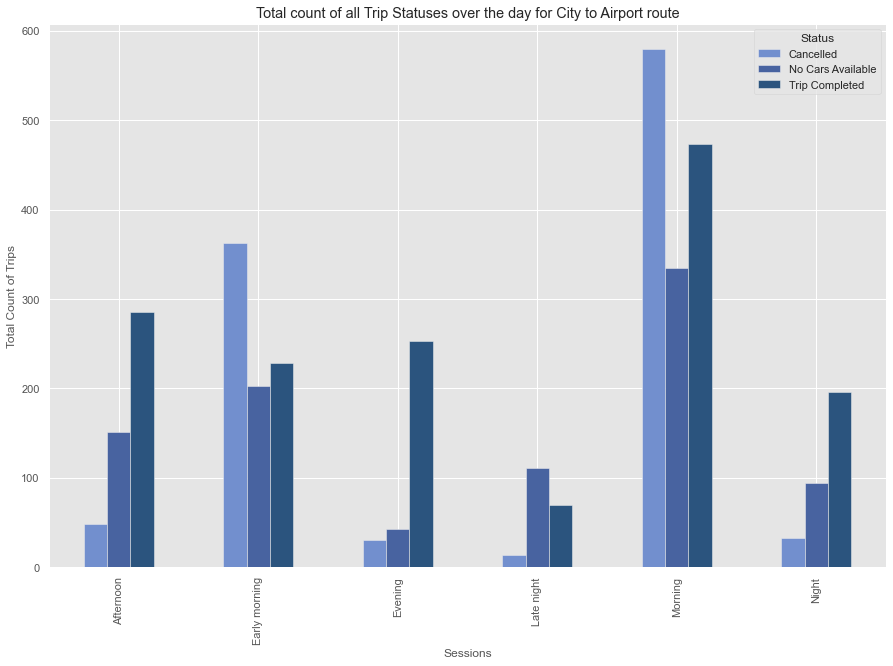

In [40]:
# Filtering out trips in the City to Airport route. Pick-up Point - City
df_citytoairport=df[df["Pickup_point"].str.contains('City')==True]
plt.style.use('ggplot')
colors = ["#728FCE", "#4863A0","#2B547E"]
df_citytoairport.groupby(['TimeSlot','Status']).TimeSlot.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Total count of all Trip Statuses over the day for City to Airport route')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trips')
plt.show()

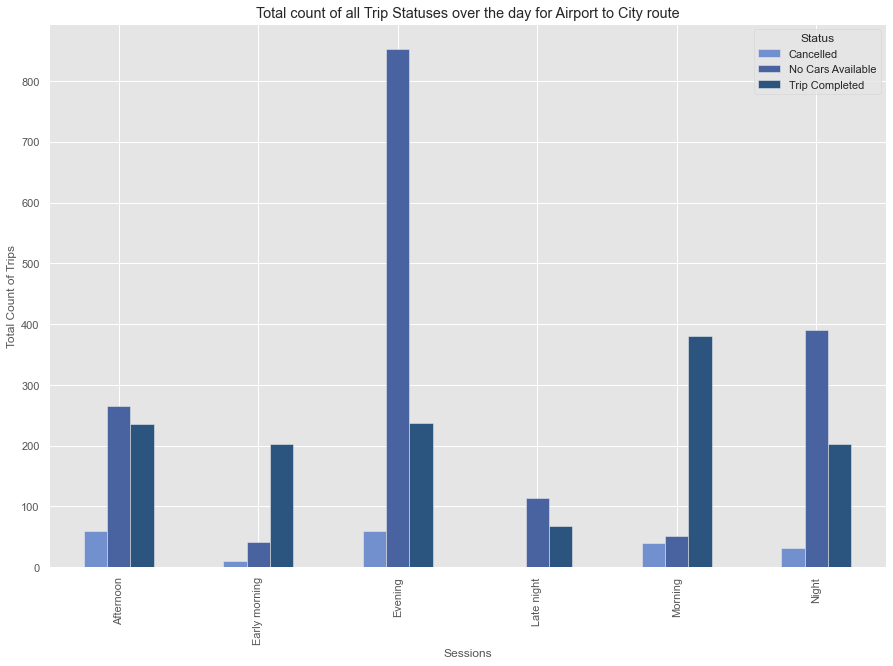

In [41]:
# Filtering out trips in the Airport to City route. Pick-up Point - City
df_citytoairport=df[df["Pickup_point"].str.contains('Airport')==True]
plt.style.use('ggplot')
colors = ["#728FCE", "#4863A0","#2B547E"]
df_citytoairport.groupby(['TimeSlot','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
df_airport_count = pd.DataFrame(df_citytoairport.Status.value_counts())
plt.title('Total count of all Trip Statuses over the day for Airport to City route')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trips')
plt.show()

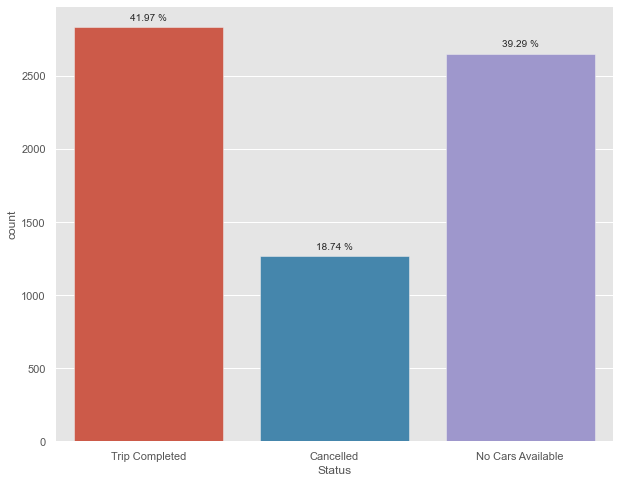

In [42]:
#To see the status of event 
plt.figure(figsize=(10, 8))
ax =sns.countplot(x="Status", data=df)
total = len(df)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.4
    Y = p.get_height()+50
    ax.text(X, Y, '{:} %'.format(value), ha="center")
plt.show()

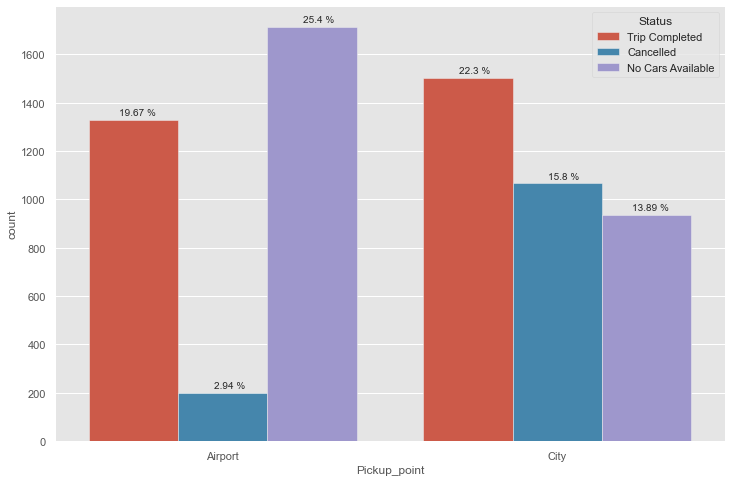

In [43]:
#merging graph to see and differenciate better
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='Pickup_point', hue="Status", data=df)
total = len(df)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.2
    Y = p.get_height()+20
    ax.text(X, Y, '{:} %'.format(value), ha="right")
plt.show()

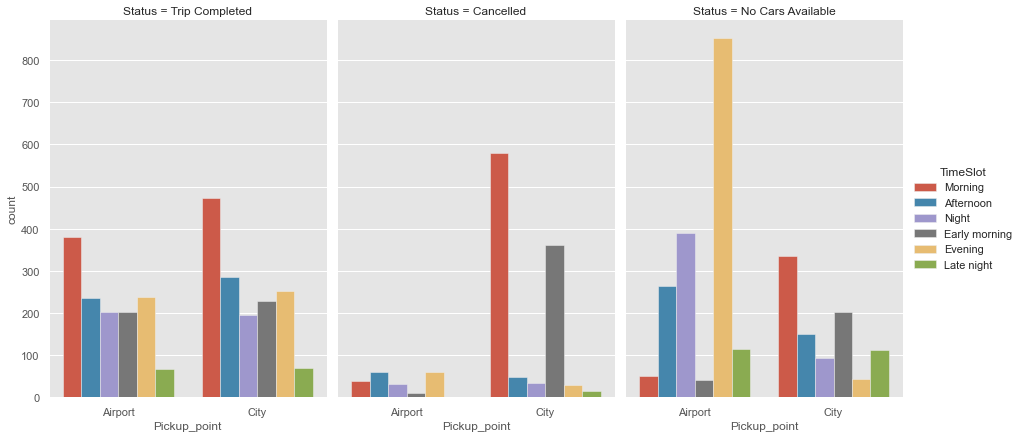

In [44]:
#To see timeslot vs pickup point
sns.catplot(x='Pickup_point',col="Status", hue = 'TimeSlot',data=df ,kind="count",
            height=6,aspect= 0.7,ci=85,col_wrap=3,margin_titles=True)
plt.show()

In [45]:
#for differiencate Gap
df.loc[(df.Status == 'Cancelled')| (df.Status == 'No Cars Available'), 'gap'] = 'Gap' 

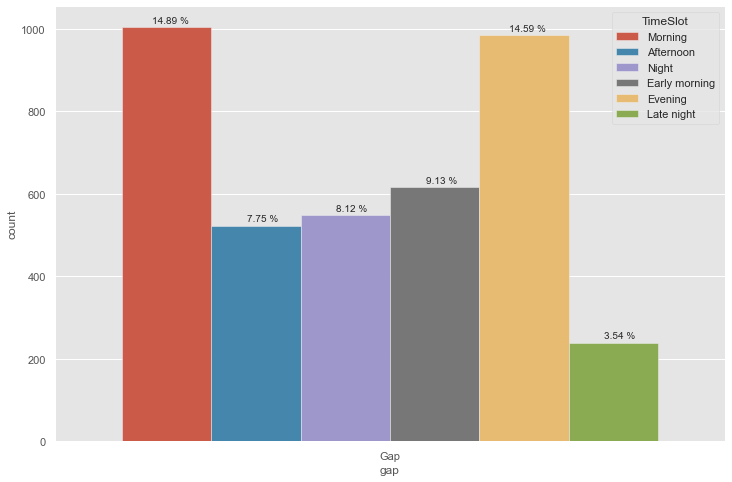

In [46]:
#To look for where gap is high
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='gap',hue="TimeSlot", data=df)
total = len(df['gap'])
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.1
    Y = p.get_height()+10
    ax.text(X, Y, '{:} %'.format(value), ha="right")
plt.show()


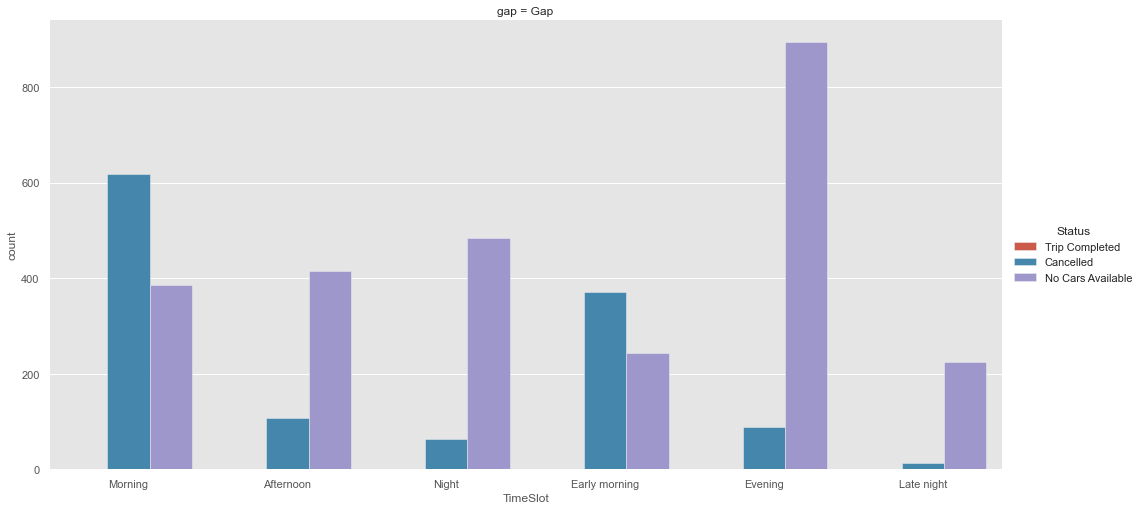

In [47]:
#To look at defference of gap in timeslot of Airport and City
sns.catplot(x='TimeSlot',col="gap", hue = 'Status',data=df ,kind="count", height=7,aspect= 2,ci=85)
plt.show()

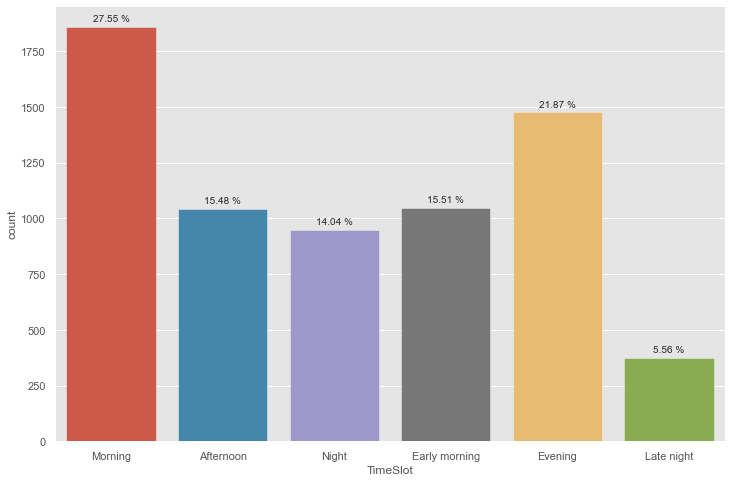

In [49]:
#looking for insight in request timeslot
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='b')
ax =sns.countplot(x='TimeSlot', data=df)
total = len(df)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.4
    Y = p.get_height()+25
    ax.text(X, Y, '{:} %'.format(value), ha="center")
plt.show()